In [1]:
import openmc
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import pandas as pd
import kdsource as kds
from mpl_toolkits.mplot3d import Axes3D as ax

In [2]:

#SEPARO POR PLANOS
Plano_1 = kds.surfsource.SurfaceSourceFile('surfsource_1.mcpl.gz')
Plano_resampled_1 = kds.surfsource.SurfaceSourceFile('resampled_1.mcpl.gz')


# Plano_2 = kds.surfsource.SurfaceSourceFile('Plano_2.h5')

Plano_3 = kds.surfsource.SurfaceSourceFile('Plano_3.h5')
Plano_3_resampled = kds.surfsource.SurfaceSourceFile('surface_source.h5')
# Plano_3_resampled.save_source_file('Plano_3_resampled.h5')


Number of particles in file surfsource_1.mcpl.gz: 812800
100% n, 0% g, 0% e-, 0% e+, 0% p, 
Number of particles in file resampled_1.mcpl.gz: 1000000
100% n, 0% g, 0% e-, 0% e+, 0% p, 
Number of particles in file Plano_3.h5: 231931
100% n, 0% g, 0% e-, 0% e+, 0% p, 
Number of particles in file surface_source.h5: 258616
100% n, 0% g, 0% e-, 0% e+, 0% p, 


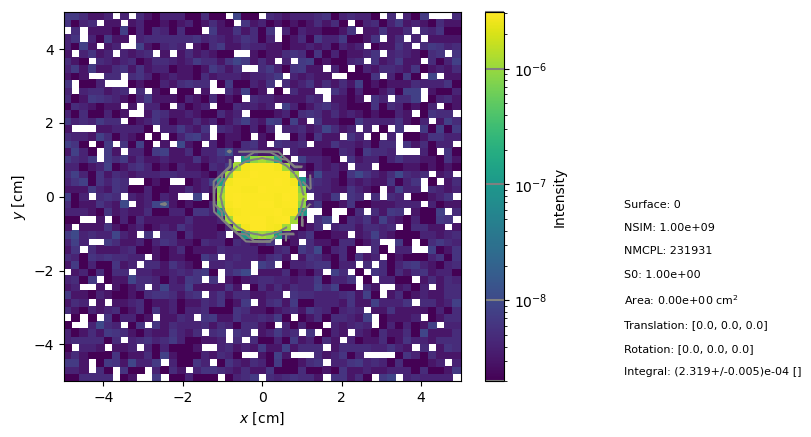

In [3]:
Plano_3.plot_distribution(vars=['x','y'],bins=[50,50], scales=['linear','linear'], norm_vars=[], info=True, zscale='log')

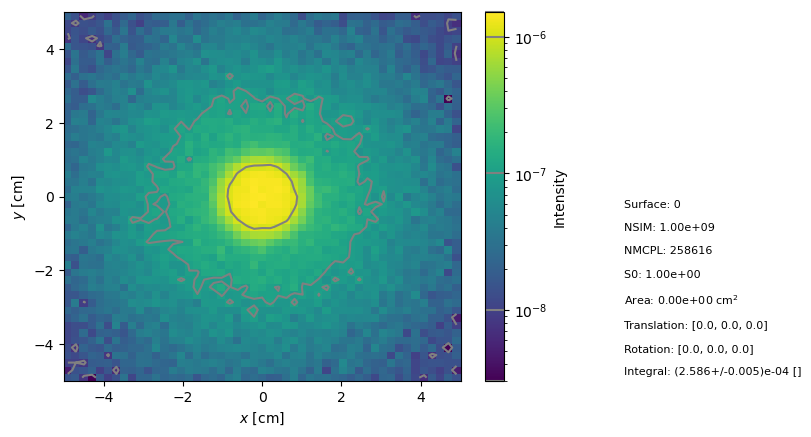

In [4]:
Plano_3_resampled.plot_distribution(vars=['x','y'],bins=[50,50], scales=['linear','linear'], norm_vars=[], info=True, zscale='log')

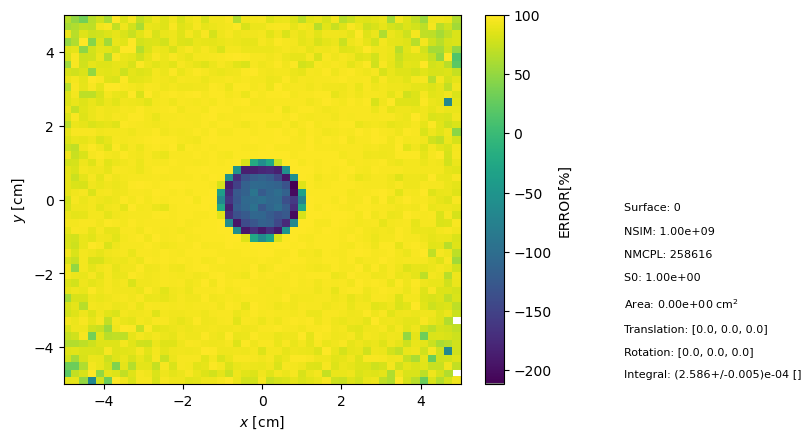

In [5]:
Plano_3_resampled.plot_distribution(vars=['x','y'],bins=[50,50], scales=['linear','linear'], norm_vars=[], info=True, zscale='linear',plot_difference=True, Difference_to=Plano_3)


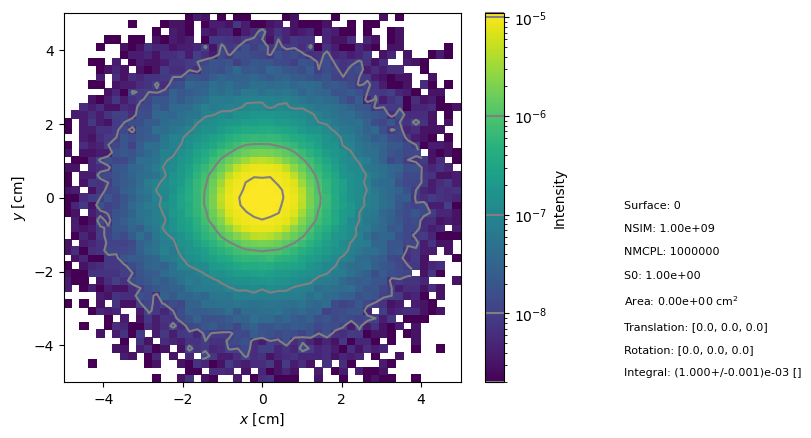

In [6]:
Plano_resampled_1.plot_distribution(vars=['x','y'],bins=[50,50], scales=['linear','linear'], norm_vars=[], info=True, zscale='log')


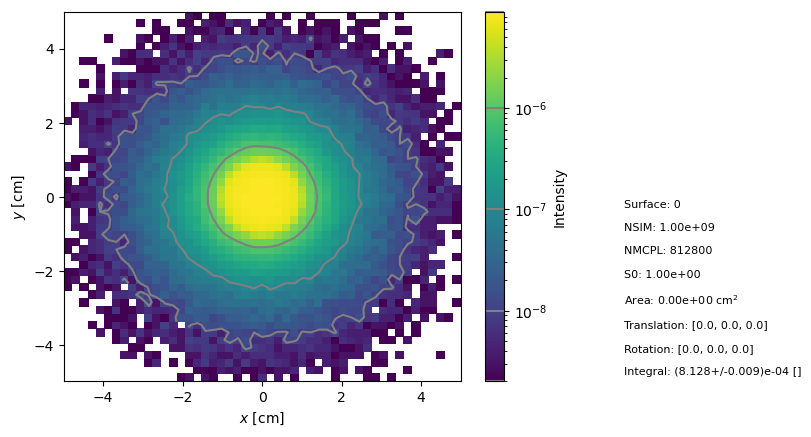

In [7]:
Plano_1.plot_distribution(vars=['x','y'],bins=[50,50], scales=['linear','linear'], norm_vars=[], info=True, zscale='log')


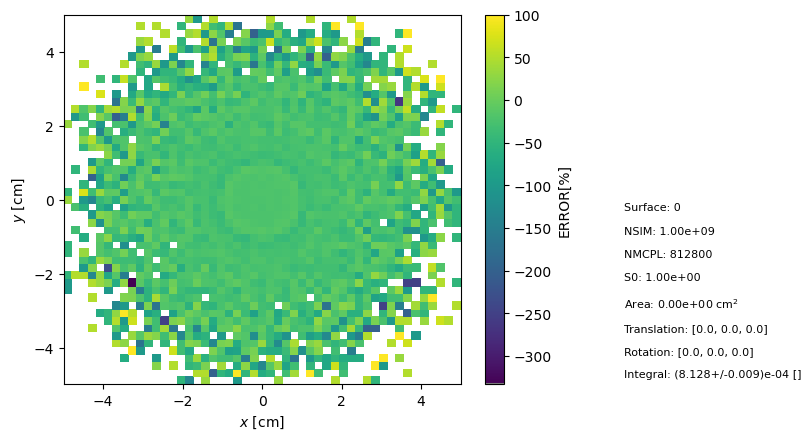

In [18]:
Plano_1.plot_distribution(vars=['x','y'],bins=[50,50], scales=['linear','linear'], norm_vars=[], info=True, zlabel='ERROR[%]',plot_difference=True, Difference_to=Plano_resampled_1)


Plotting x*f(x) instead of f(x) (xscale='log')
Plotting x*f(x) instead of f(x) (xscale='log')


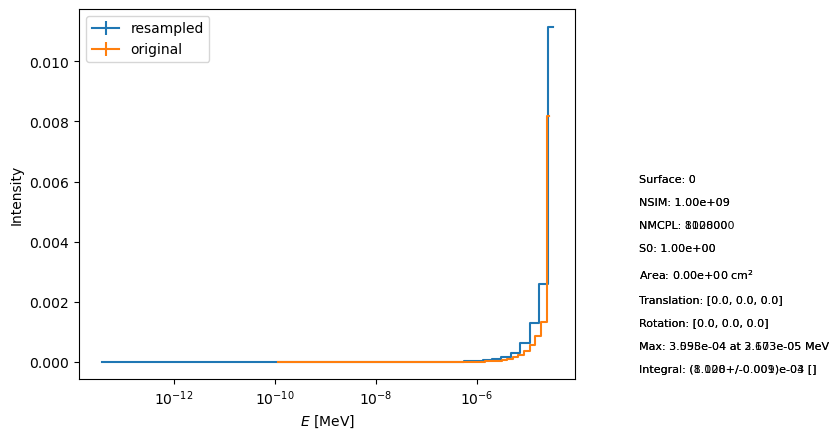

In [9]:
label_r = {'label' : 'resampled'}
label_o = {'label' : 'original'}
Plano_resampled_1.plot_distribution(vars=['E'],bins=[50], scales=['log','linear'], norm_vars=[], info=True, **label_r)
Plano_1.plot_distribution(vars=['E'],bins=[50], scales=['log','linear'], norm_vars=[], info=True, **label_o)
plt.legend()

In [15]:
df,bins,ka = Plano_1.get_distribution(vars=['E'],bins=[50], scales=['log','linear'])

dist_res = Plano_resampled_1.get_distribution(vars=['E'],bins = bins, scales=['log','linear'])
(df['mean']/dist_res[0]['mean'])


0     0.083333
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.153846
6     0.107143
7     0.160714
8     0.120000
9     0.184211
10    0.260504
11    0.378788
12    0.387978
13    0.531381
14    0.542587
15    0.827298
16    0.952290
17    1.214176
18    1.460526
19    1.651185
20    1.758461
21    1.913900
22    2.146644
23    2.023992
24    1.903366
25    1.669004
26    1.414479
27    1.163117
28    0.980776
29    0.835869
30    0.749314
31    0.670355
32    0.620102
33    0.589940
34    0.577915
35    0.608048
36    0.650895
37    0.712367
38    0.753666
39    0.780901
40    0.800274
41    0.803027
42    0.810641
43    0.811505
44    0.812337
45    0.811016
46    0.815459
47    0.811576
48    1.008788
Name: mean, dtype: float64

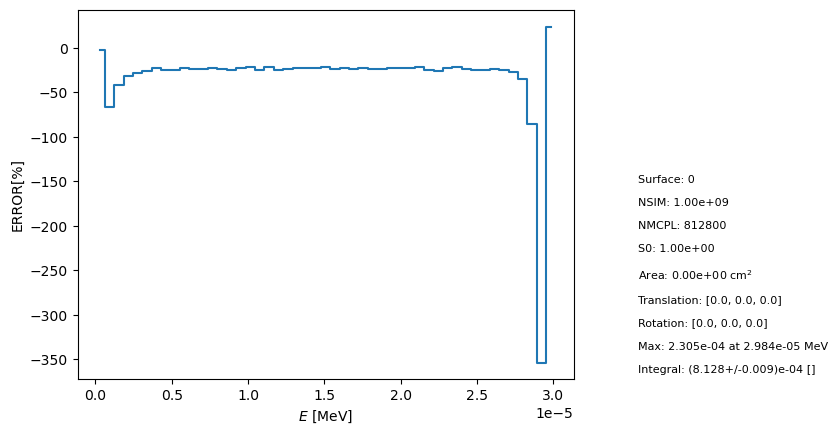

In [17]:
Plano_1.plot_distribution(vars=['E'],bins=[50], scales=['linear','linear'], norm_vars=[], info=True, plot_difference=True, Difference_to=Plano_resampled_1)


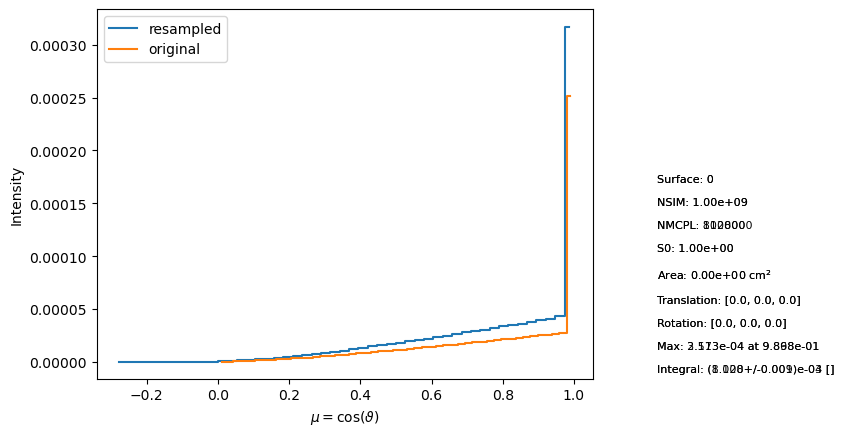

In [13]:
Plano_resampled_1.plot_distribution(vars=['mu'],bins=[50], scales=['linear','linear'], norm_vars=[], info=True)
Plano_1.plot_distribution(vars=['mu'],bins=[50], scales=['linear','linear'], norm_vars=[], info=True)

plt.gca().lines[0].set_label('resampled')
plt.gca().lines[1].set_label('original')
plt.legend()

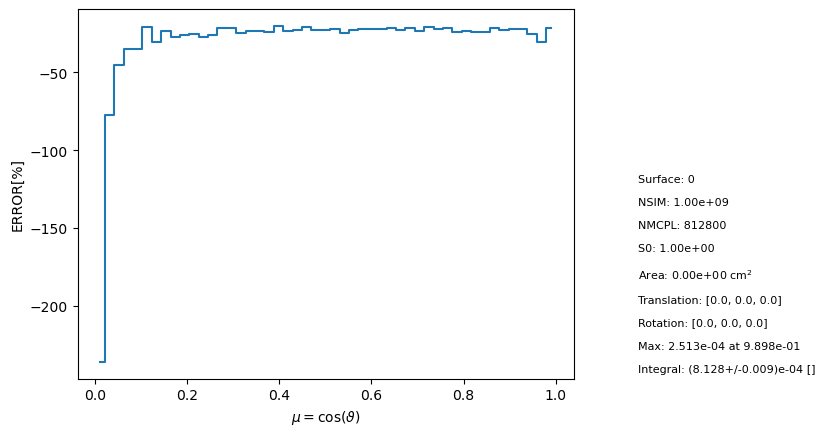

In [16]:
Plano_1.plot_distribution(vars=['mu'],bins=[50], scales=['linear','linear'], norm_vars=[], info=True, plot_difference=True, Difference_to=Plano_resampled_1)